In [3]:
from IPython.display import Image
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

In [4]:
df = pd.read_csv("Carseats.csv")
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
feature_cols = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age','Education','Urban']
x = df[feature_cols]
y = df.US

In [6]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(df[['ShelveLoc']]).toarray())
final_df = df.join(encoder_df)
print(final_df)
final_df.drop('ShelveLoc', axis=1, inplace=True)
print(final_df)
final_df.columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age','Education','Urban', 'US', 'ShelveLocBad','ShelveLocGood','ShelveLocMedium']
print(final_df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US    0    1    

In [7]:
final_df['Urban']=final_df['Urban'].replace('Yes',0)
final_df['Urban']=final_df['Urban'].replace('No',1)


In [8]:
final_df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLocBad,ShelveLocGood,ShelveLocMedium
0,9.50,138,73,11,276,120,42,17,0,Yes,1.0,0.0,0.0
1,11.22,111,48,16,260,83,65,10,0,Yes,0.0,1.0,0.0
2,10.06,113,35,10,269,80,59,12,0,Yes,0.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,0,Yes,0.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,0,No,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,Yes,0.0,1.0,0.0
396,6.14,139,23,3,37,120,55,11,1,Yes,0.0,0.0,1.0
397,7.41,162,26,12,368,159,40,18,0,Yes,0.0,0.0,1.0
398,5.94,100,79,7,284,95,50,12,0,Yes,1.0,0.0,0.0


In [9]:
x=final_df.drop(['US'],axis=1)
y=final_df['US']

In [10]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,ShelveLocBad,ShelveLocGood,ShelveLocMedium
0,9.50,138,73,11,276,120,42,17,0,1.0,0.0,0.0
1,11.22,111,48,16,260,83,65,10,0,0.0,1.0,0.0
2,10.06,113,35,10,269,80,59,12,0,0.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,0,0.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0.0,1.0,0.0
396,6.14,139,23,3,37,120,55,11,1,0.0,0.0,1.0
397,7.41,162,26,12,368,159,40,18,0,0.0,0.0,1.0
398,5.94,100,79,7,284,95,50,12,0,1.0,0.0,0.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8125


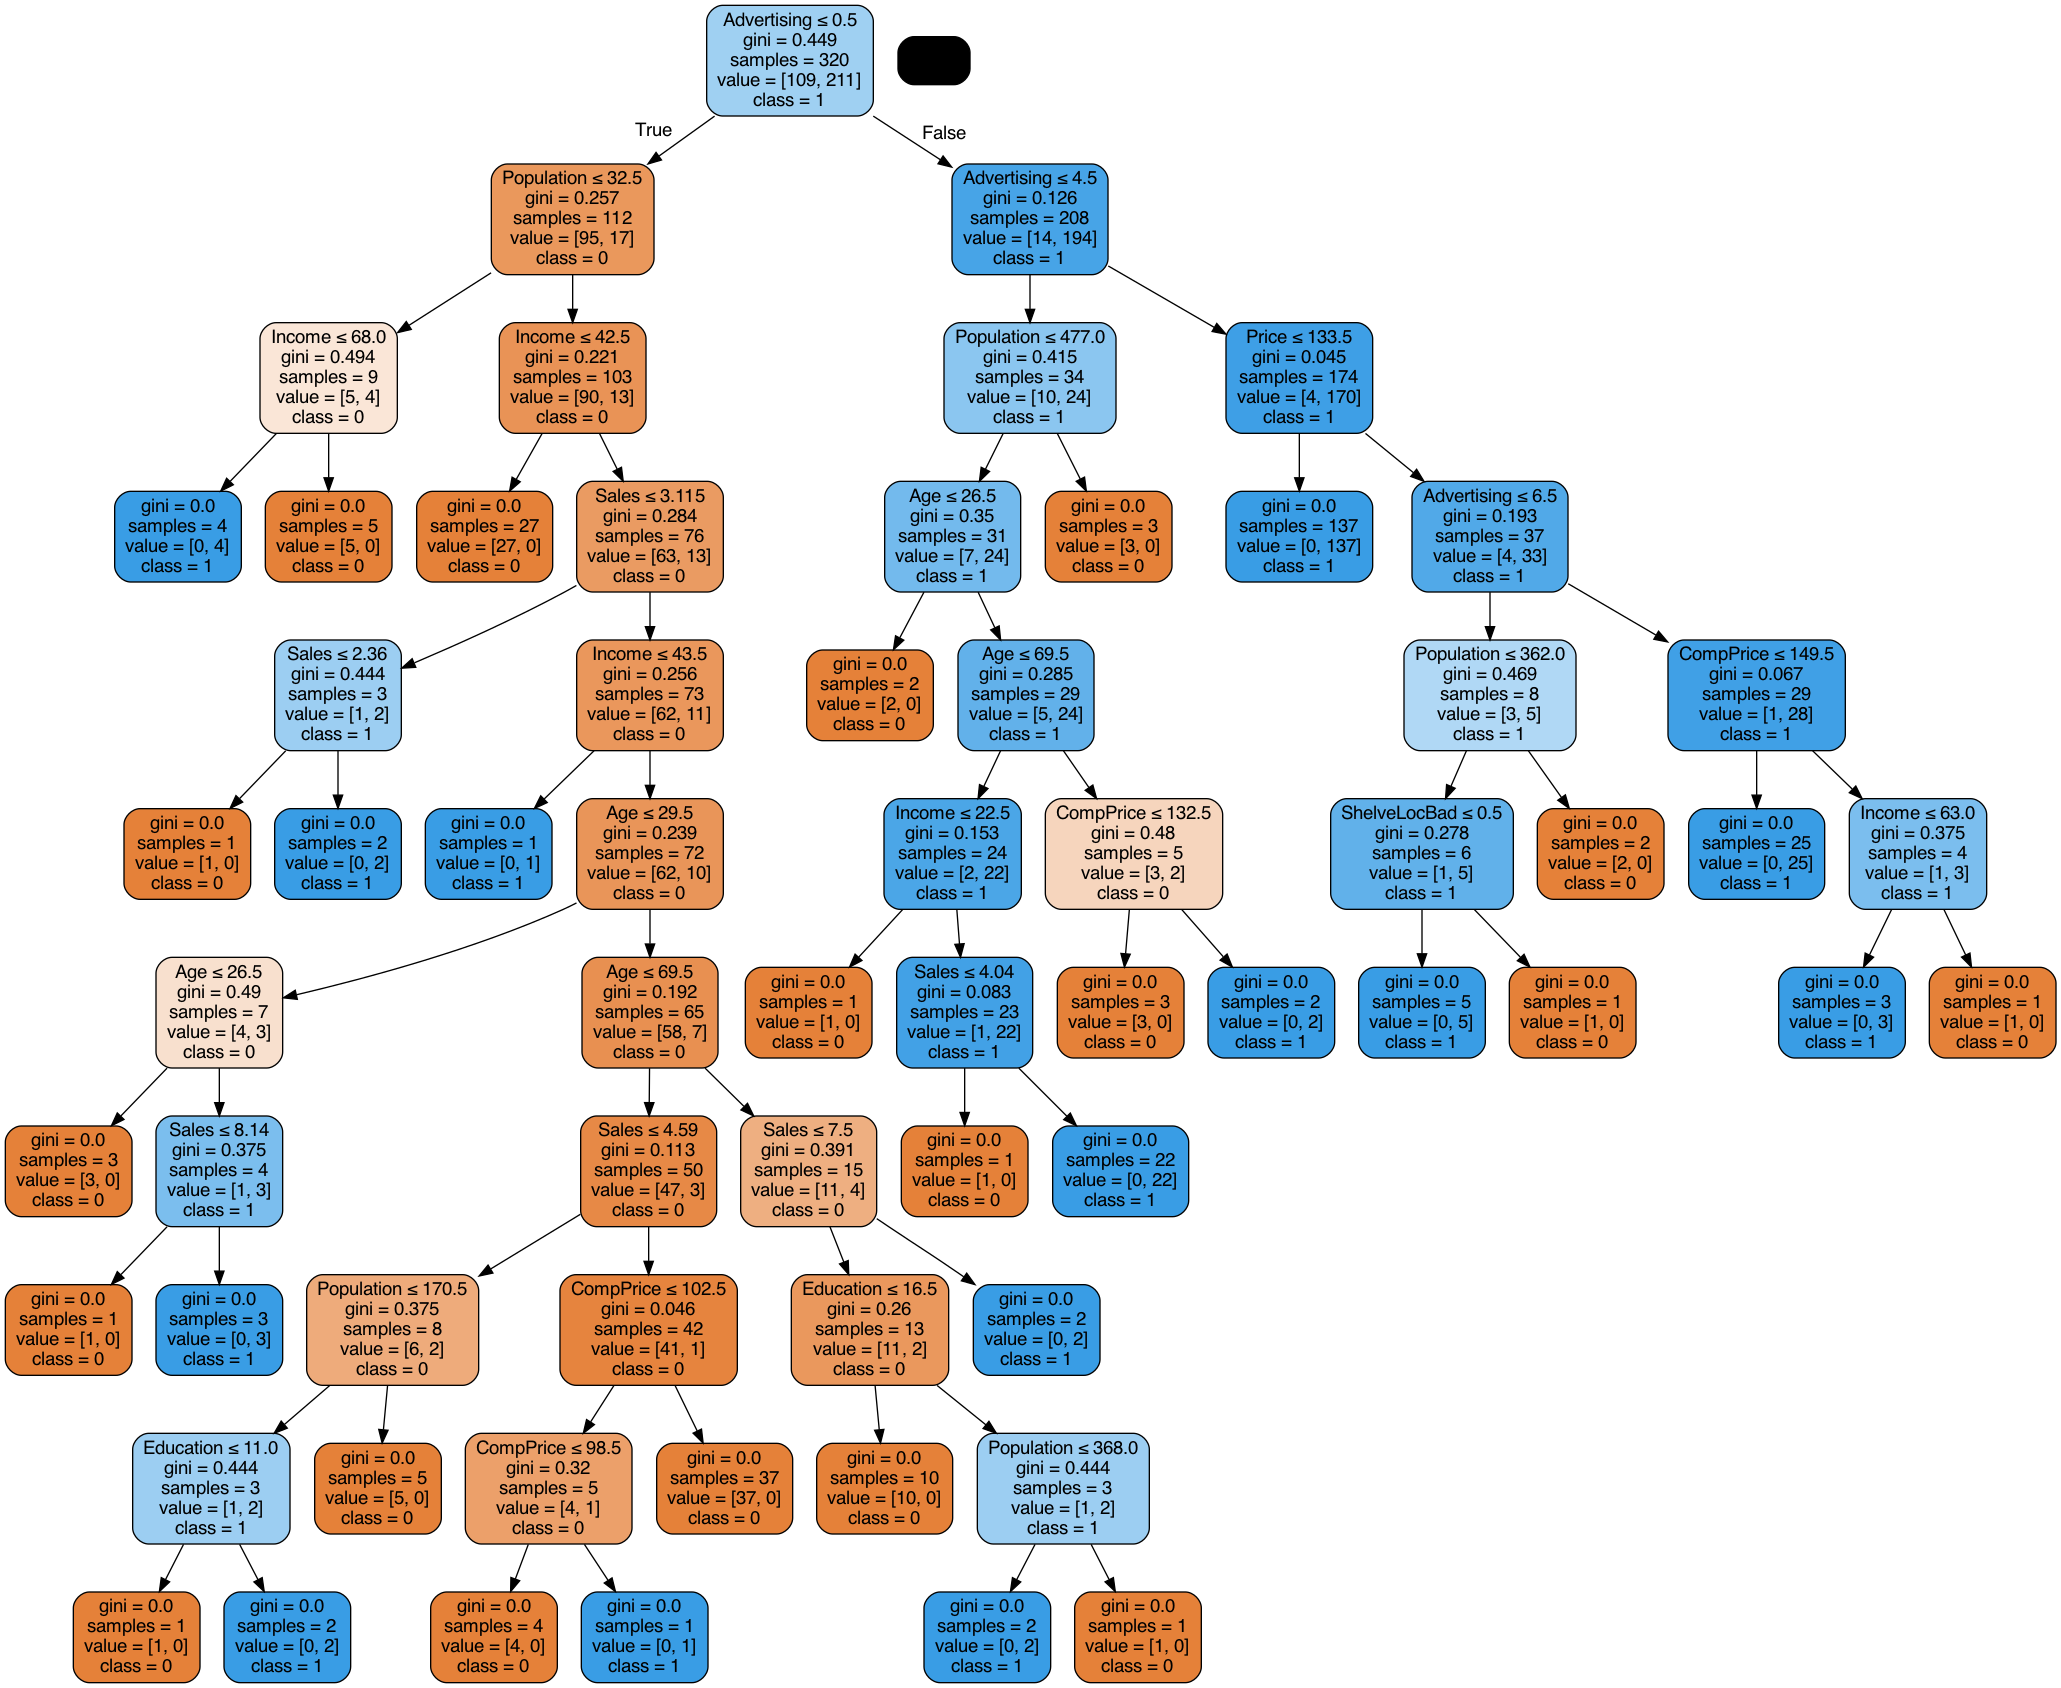

In [14]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('carseats.png')
Image(graph.create_png())
